## Project 1:
Researchers want to test the effect of smoking and weight on hypertension. Therefore, they evaluate the systolic blood pressure of 500 persons.
Smoking is indicated as a factor (0: no smoking and 1:smoking). The chance on overweight is given by a factor 0, 1 and 2 with 0 indicating a normal BMI, 1 a BMI between 25 and 30 and 2 a BMI over 30. For this specific dataset:

- Indicate the observational unit(s), experimental unit(s), response variable(s) and explanatory variable(s).
- Is this an observational study or experimental study?
- Formulate the test hypotheses
- Explore the data making use of valuable plots and tables
- Based on the plots you have made, are the assumptions fulfilled to either use a t-test, anova or general linear model.
- Independent of the fulfillment of the assumptions, assess the effects of the explanatory variable(s) making use of a t-test or an anova. If there are multiple explanatory variables, apply one test for each.
- Assess the effects of the explanatory variable(s) making use of a general linear model and fit the best possible model. Calculate the variance inflation factor of your model(s).
- Do you think the researchers collected enough data? Which variables would you have included in the study and could be confounding factors?
- Draw a conclusion based on the general linear model.

The data can be found in the txt file SBP_smoking.txt on Ufora.

Good luck!

# Project 1 - Investigating the impact of smoking and weight on hypertension
In this project, researchers aim to investigate the impact of smoking and weight on hypertension by evaluating the systolic blood pressure of 500 individuals. The dataset includes information on smoking status (0: non-smoking, 1: smoking) and weight, represented by three categories (0: normal BMI, 1: BMI between 25 and 30, 2: BMI over 30). This project involves a comprehensive analysis, exploring data through plots and tables, testing assumptions for statistical methods, and ultimately drawing conclusions based on the general linear model.

The individuals who took part in the research serve as both the experimental and observational units. Systolic blood pressure is the response variable, while smoking and overweight are the explanatory variables.

The study involves a sample drawn from the population, and it assumes the form of an observational study. Participants did not undergo any treatment or intervention, as it would be unethical to induce changes in their smoking habits or weight.

*The first null hypothesis (H0_1)*\
On average, smoking has no effect on systolic blood pressure.

*The second null hypothesis (H0_2)*\
On average, weight has no effect on systolic blood pressure.

*The first alternative hypothesis (Ha_1)*\
On average, there is an effect of smoking on systolic blood pressure.

*The second alternative hypothesis (Ha_2)*\
On average, there is an effect of at least 1 of the BMI categories on systolic blood pressure.

In [1]:
# Installing packages
install.packages("car")
install.packages("grid")
install.packages("gridExtra")
# Loading packages to library
library("ggplot2")
library(car)
library("grid")
library("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘grid’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading required package: carData



## Data Exploration

The dataset, named SBP_smoking, is loaded and comprises information on systolic blood pressure, smoking status, and weight categories. The summary reveals the distribution of non-smokers, smokers, and individuals in different BMI categories. The number of non-smokers is 234. The number of smokers is 266. The number of people with normal BMI is 187. The number of people with BMI between 25 to 30 (overweight) is 109. The number of people with BMI above 30 (obese) is 204.

In [3]:
SBP_smoking <- read.csv("SBP_smoking.txt", header=TRUE, sep="\t")
SBP_smoking$Smoke <- factor(SBP_smoking$Smoke)
SBP_smoking$Overwt <- factor(SBP_smoking$Overwt)
summary(SBP_smoking)

       X           SystolicBP    Smoke   Overwt 
 Min.   :  1.0   Min.   : 67.0   0:234   0:187  
 1st Qu.:125.8   1st Qu.:130.0   1:266   1:109  
 Median :250.5   Median :140.5           2:204  
 Mean   :250.5   Mean   :145.0                  
 3rd Qu.:375.2   3rd Qu.:162.2                  
 Max.   :500.0   Max.   :224.0                  

The assumptions required for general linear models, such as ANOVA and t-tests, involve data independence within and between groups, normality, and equality of variances.

The data demonstrates independence within and between groups, satisfying the assumption for data independence.

The assumptions of equality of variances and normality are evaluated using boxplots and qqplots respectively.

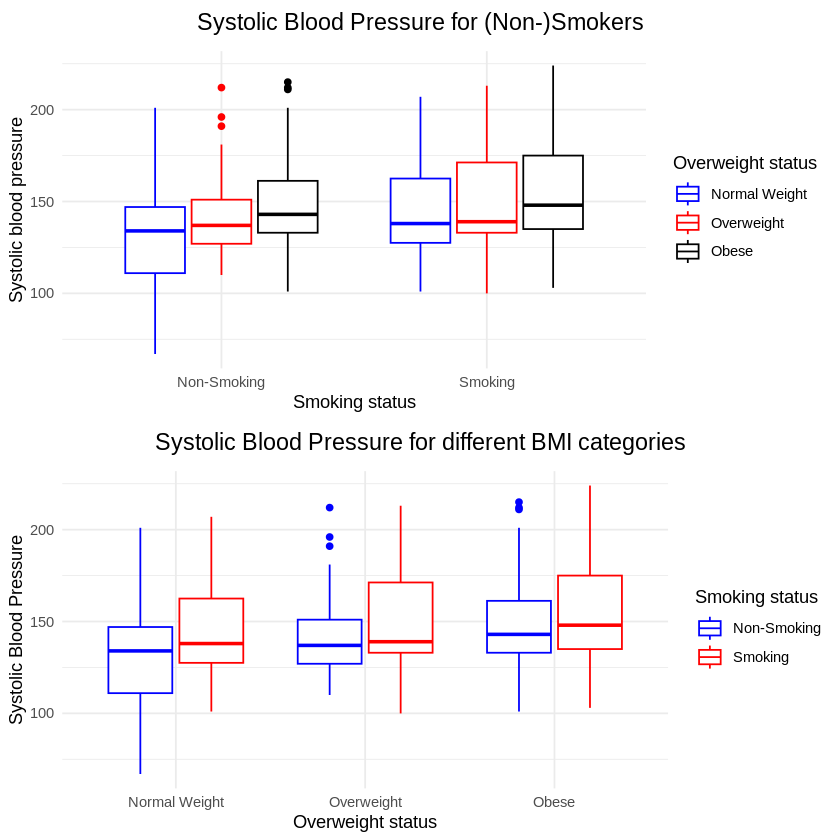

In [4]:
bpS <- ggplot(SBP_smoking, aes(Smoke, SystolicBP, col = Overwt)) +
  geom_boxplot() +
  xlab("Smoking status") +
  ylab("Systolic blood pressure") +
  scale_color_manual(values = c("0" = "blue", "1" = "red", "2" = "black"),
                     name = "Overweight status",
                     labels = c("0" = "Normal Weight", "1" = "Overweight", "2" = "Obese")) +
  scale_x_discrete(labels = c("0" = "Non-Smoking", "1" = "Smoking")) +
  theme_minimal()

bpO <- ggplot(SBP_smoking, aes(Overwt, SystolicBP, col = Smoke)) +
  geom_boxplot() +
  xlab("Overweight status") +
  ylab("Systolic Blood Pressure") +
  scale_color_manual(values = c("0" = "blue", "1" = "red"),
                     name = "Smoking status",
                     labels = c("0" = "Non-Smoking", "1" = "Smoking")) +
  scale_x_discrete(labels = c("0" = "Normal Weight", "1" = "Overweight", "2" = "Obese")) +
  theme_minimal()

title1 <- textGrob("Systolic Blood Pressure for (Non-)Smokers", gp = gpar(fontsize = 14))
title2 <- textGrob("Systolic Blood Pressure for different BMI categories", gp = gpar(fontsize = 14))

grid.arrange(
  title1,
  bpS,
  title2,
  bpO,
  nrow = 4,
  heights = c(0.1, 0.9, 0.1, 0.9)
)

The more or less equal interquartile ranges between boxplots of the different experimental variables suggests equal variances. Although there is a difference between the interquartile ranges between the non-smoking and smoking groups in the overweight and obese categories, these differences are small enough to still consider equality of the variances. For general linear models, homogeneity of variances among groups is crucial. Ideally, the spread of data within groups should be similar across different categorical levels, although median differences can exist.

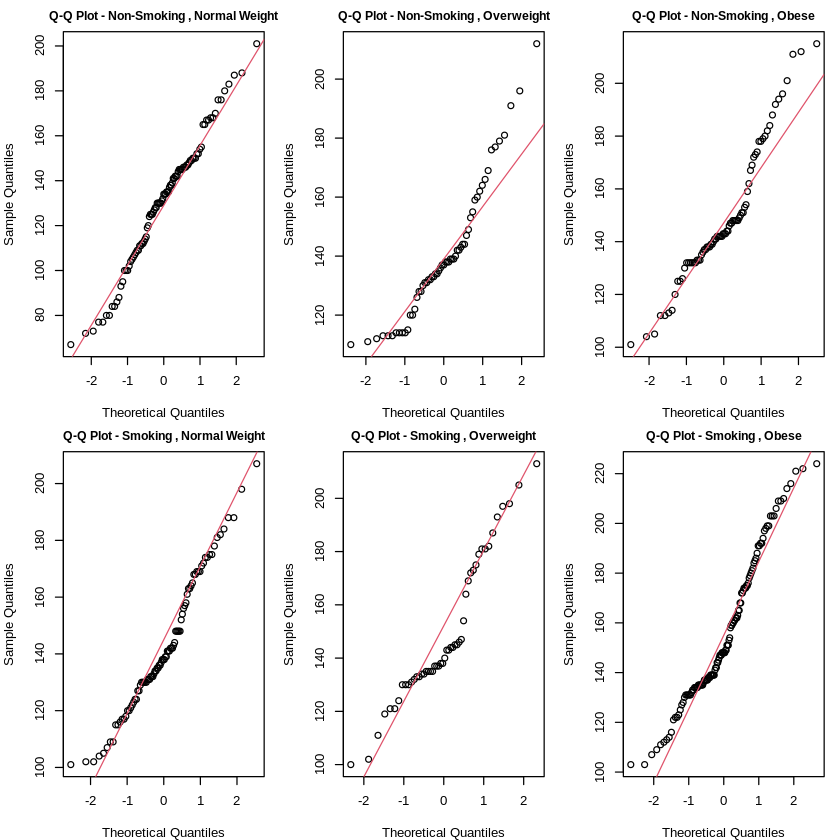

In [5]:
subsets <- list()
for (smoke_status in unique(SBP_smoking$Smoke)) {
  for (BMI_category in unique(SBP_smoking$Overwt)) {
    subset_name <- paste("subset_", smoke_status, "_", BMI_category, sep="")
    subset <- SBP_smoking[SBP_smoking$Smoke == smoke_status & SBP_smoking$Overwt == BMI_category,]
    subsets[[subset_name]] <- subset
  }
}

par(mfrow = c(2, 3), mar = c(4, 4, 2, 1))

for (smoke_status in c("0", "1")) {
  for (bmi_category in c("0", "1", "2")) {
    subset_name <- paste("subset_", smoke_status, "_", bmi_category, sep="")

    subset_data <- subsets[[subset_name]]

    smoke_label <- ifelse(smoke_status == "0", "Non-Smoking", "Smoking")
    bmi_label <- switch(bmi_category,
                        "0" = "Normal Weight",
                        "1" = "Overweight",
                        "2" = "Obese")

    qq_name <- paste("Q-Q Plot -", smoke_label, ",", bmi_label, sep=" ")
    qqnorm(subset_data$SystolicBP, main = qq_name, cex.main = 0.93)
    qqline(subset_data$SystolicBP, col = 2)
  }
}

par(mfrow = c(1, 1))

In an ideal scenario, data points on a QQ plot would align closely along a straight line, signifying normality. Three of these plots (non-smoking and overweight, non-smoking and obese, smoking-overweight) reveal deviations of sample quantiles from expected theoretical quantiles, indicating a difference from normal distribution.

In summary, the assumptions for ANOVA and t-tests are met for data independence and equality of variances among groups, but violated for normal distribution. A log-transformation might minimize the normality issue.

In [6]:
SBP_smoking$logSystolicBP <- log(SBP_smoking$SystolicBP)
head(SBP_smoking)

,X,SystolicBP,Smoke,Overwt,logSystolicBP
,<int>,<int>,<fct>,<fct>,<dbl>
1,1,133,0,2,4.890349
2,2,115,1,0,4.744932
3,3,140,1,1,4.941642
4,4,132,0,2,4.882802
5,5,133,0,1,4.890349
6,6,138,0,1,4.927254


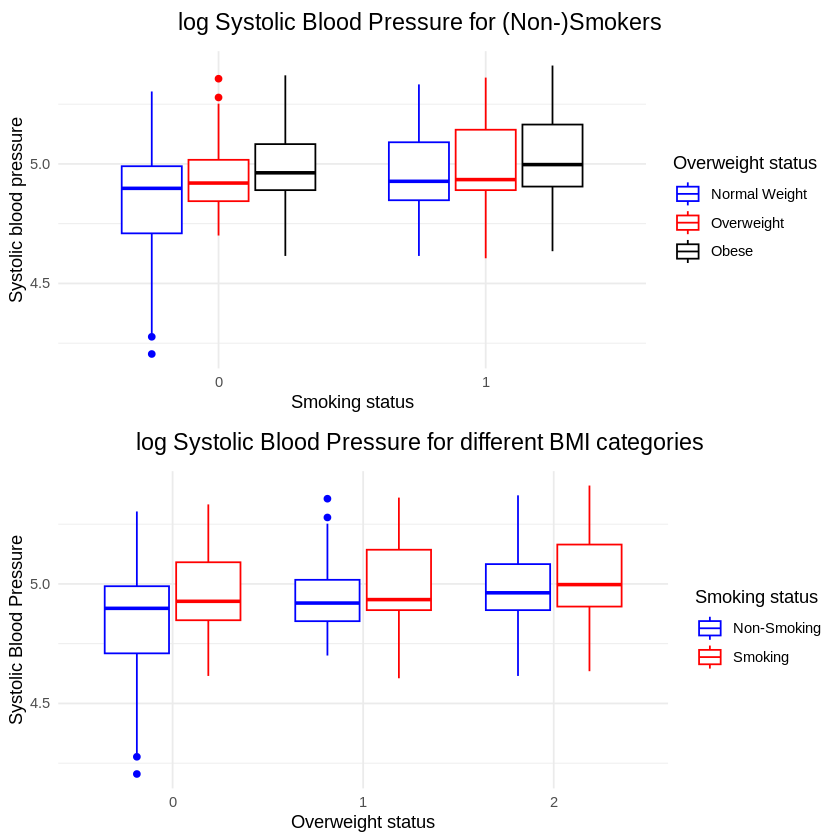

In [7]:
bpS <- ggplot(SBP_smoking, aes(Smoke, logSystolicBP, col = Overwt)) +
  geom_boxplot() +
  xlab("Smoking status") +
  ylab("Systolic blood pressure") +
  scale_color_manual(values = c("0" = "blue", "1" = "red", "2" = "black"),
                     name = "Overweight status",
                     labels = c("0" = "Normal Weight", "1" = "Overweight", "2" = "Obese")) +
  theme_minimal()

bpO <- ggplot(SBP_smoking, aes(Overwt, logSystolicBP, col = Smoke)) +
  geom_boxplot() +
  xlab("Overweight status") +
  ylab("Systolic Blood Pressure") +
  scale_color_manual(values = c("0" = "blue", "1" = "red"),
                     name = "Smoking status",
                     labels = c("0" = "Non-Smoking", "1" = "Smoking")) +
  theme_minimal()

title1 <- textGrob("log Systolic Blood Pressure for (Non-)Smokers", gp = gpar(fontsize = 14))
title2 <- textGrob("log Systolic Blood Pressure for different BMI categories", gp = gpar(fontsize = 14))

grid.arrange(
  title1,
  bpS,
  title2,
  bpO,
  nrow = 4,
  heights = c(0.1, 0.9, 0.1, 0.9)
)


The log transformation does not have any visible impact on the variance.

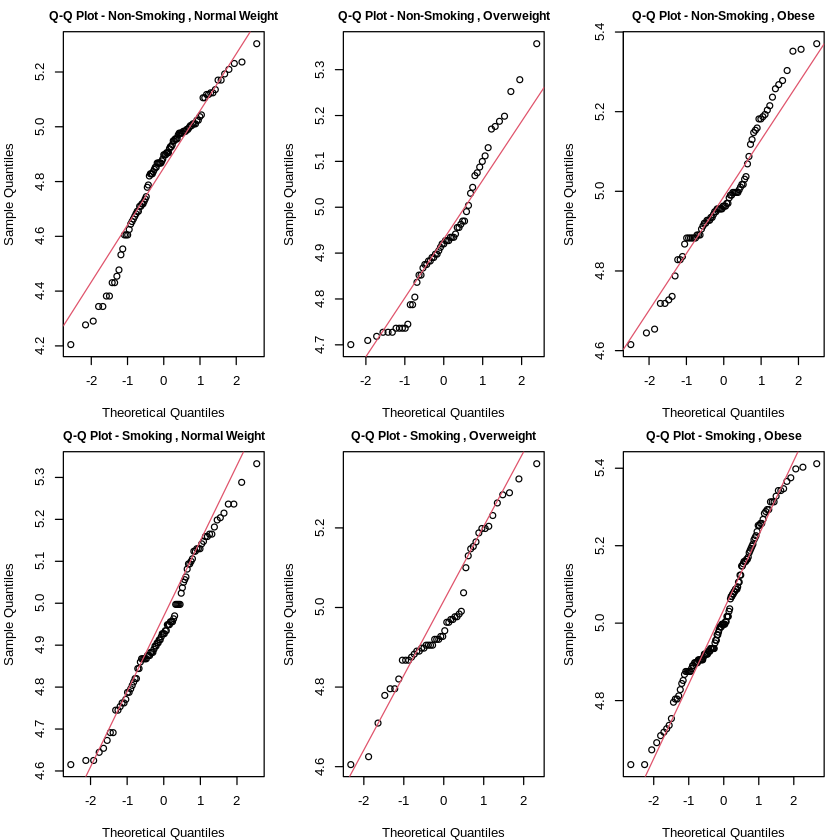

In [8]:
subsets <- list()
for (smoke_status in unique(SBP_smoking$Smoke)) {
  for (BMI_category in unique(SBP_smoking$Overwt)) {
    subset_name <- paste("subset_", smoke_status, "_", BMI_category, sep="")
    subset <- SBP_smoking[SBP_smoking$Smoke == smoke_status & SBP_smoking$Overwt == BMI_category,]
    subsets[[subset_name]] <- subset
  }
}
par(mfrow = c(2, 3), mar = c(4, 4, 2, 1))

for (smoke_status in c("0", "1")) {
  for (bmi_category in c("0", "1", "2")) {
    subset_name <- paste("subset_", smoke_status, "_", bmi_category, sep="")

    subset_data <- subsets[[subset_name]]

    smoke_label <- ifelse(smoke_status == "0", "Non-Smoking", "Smoking")
    bmi_label <- switch(bmi_category,
                        "0" = "Normal Weight",
                        "1" = "Overweight",
                        "2" = "Obese")

    qq_name <- paste("Q-Q Plot -", smoke_label, ",", bmi_label, sep=" ")
    qqnorm(subset_data$logSystolicBP, main = qq_name, cex.main = 0.93)
    qqline(subset_data$logSystolicBP, col = 2)
  }
}

par(mfrow = c(1, 1))

By log transforming the data, the assumption of normal distribution is still not met. Four of these plots (non-smoking and normal weight, non-smoking and overweight, non-smoking and obese, smoking-overweight) reveal deviations of sample quantiles from expected theoretical quantiles, indicating a difference from normal distribution. The log transformation did not improve the normality assumption, thus the original data is used for further analysis.

## Statistical tests

Despite unfulfilled assumptions for general linear models, a t-test, anova and general linear model will still be performed to evaluate the differences between groups. Relying on these analyses despite unmet assumptions for general linear models may yield unreliable results, as violating the assumptions can affect the validity and interpretability of statistical tests.

A two sample t-test will be conducted to evaluate the influence of smoking on systolic blood pressure by comparing non-smokers and smokers. This specific test is selected due to the presence of only two distinct groups, allowing for a direct comparison.

In [9]:
t.test(SystolicBP ~ Smoke, data = SBP_smoking, var.equal=TRUE)


	Two Sample t-test

data:  SystolicBP by Smoke
t = -4.4001, df = 498, p-value = 1.324e-05
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -15.683992  -6.001118
sample estimates:
mean in group 0 mean in group 1 
       139.1838        150.0263 


The result indicates that the factor Smoking has a statistically significant effect on the variable Systolic Blood Pressure. The extremely significant p-value (1.324e-05 < 0.001) suggests strong evidence against the first null hypothesis (H0_1), indicating that smoking has an effect on Systolic Blood Pressure. Based on the results, the average systolic blood pressure is higher among the individuals that smoke.


The ANOVA test will analyze the impact of BMI on systolic blood pressure across the three BMI categories: normal, overweight, and obese. The ANOVA test is selected for this analysis as it accommodates the comparison across more than 2 groups.

In [10]:
anova1way <- aov(SystolicBP ~ Overwt, data = SBP_smoking)
summary(anova1way)

             Df Sum Sq Mean Sq F value  Pr(>F)    
Overwt        2  27801   13900   19.02 1.1e-08 ***
Residuals   497 363274     731                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The result indicates that the factor Overweight has a statistically significant effect on the variable Systolic Blood Pressure. The extremely significant p-value (1.1e-08 < 0.001) suggests strong evidence against the second null hypothesis (H0_2), indicating that at least one of the levels of Overweight (normal, overweight, and obese) has a different effect on systolic blood )pressure.

The two-way ANOVA test will analyze the impact of BMI and smoking habits on systolic blood pressure. The two-way ANOVA test is selected for this analysis as it allows comparison of 2 independent variables (BMI category, smoking habits) on the dependent variables (systolic blood pressure).

In [13]:
anova2way_interaction <- aov(SystolicBP ~ Smoke * Overwt, data = SBP_smoking)
summary(anova2way_interaction)

              Df Sum Sq Mean Sq F value   Pr(>F)    
Smoke          1  14635   14635  20.526 7.39e-06 ***
Overwt         2  23443   11722  16.440 1.22e-07 ***
Smoke:Overwt   2    769     384   0.539    0.584    
Residuals    494 352228     713                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The result indicates that both factors Smoke and Overweight have a statistically significant effect on the variable Systolic Blood Pressure. The extremely significant p-values ( < 0.001) suggests strong evidence against the null hypotheses (H0_1 and H0_2), indicating that both smoking and at least one of the levels of Overweight (normal, overweight, and obese) have an effect on systolic blood pressure.

The interaction term between Smoke and Overweight is not significant (p=0.584 > 0.05). This means that there is no additional effect when an individual smokes and has a BMI between 25 and 30 or above 30. The combined effect of smoking and weight on systolic blood pressure appears to be not significantly different from the sum of their individual effects.

While the t-test, 1-way ANOVA, and 2-way ANOVA offer initial insights into the relationship between smoking habits, BMI category, and systolic blood pressure, a general linear model enables a more in-depth exploration. It offers a more flexible framework, encompassing various statistical models and can handle multiple independent variables. This method also allows the inclusion of an interaction term, considering potential effects of the relationship between smoking habits and BMI category on systolic blood pressure.

The model will be written as such:

E[Y] = beta0 + X1*beta1 + X2*beta2 + X3*beta3 + X1*X2*beta4 + X1*X3*beta5

X1 {0: non-smoking, 1: smoking}
X2 {0: normal weight, 1: overweight}
X3 {0: normal weight, 1: obese}

In [ ]:
linearmodel <- lm(SystolicBP ~ Smoke + Overwt + Smoke:Overwt, data = SBP_smoking)
summary(linearmodel)


Call:
lm(formula = SystolicBP ~ Smoke + Overwt + Smoke:Overwt, data = SBP_smoking)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.381 -18.381  -4.711  18.212  71.254 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     130.381      2.711  48.090  < 2e-16 ***
Smoke1           12.330      3.908   3.155   0.0017 ** 
Overwt1          10.364      4.409   2.351   0.0191 *  
Overwt2          18.567      4.061   4.572 6.11e-06 ***
Smoke1:Overwt1   -4.435      6.451  -0.688   0.4921    
Smoke1:Overwt2   -5.477      5.484  -0.999   0.3184    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.7 on 494 degrees of freedom
Multiple R-squared:  0.09933,	Adjusted R-squared:  0.09022 
F-statistic:  10.9 on 5 and 494 DF,  p-value: 5.824e-10


In [ ]:
vif(linearmodel)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



,GVIF,Df,GVIF^(1/(2*Df))
Smoke,2.666581,1,1.632967
Overwt,4.359391,2,1.444962
Smoke:Overwt,8.177223,2,1.691031


The interaction terms are not significant (p-values > 0.05).

Based on the variance inflation factor (VIF), a measure of multicolinearity among the independent variables in regression analysis, there is a high multicolinearity between the chosen variables. When VIF values are close to 1, it indicates that the variance of the estimated coefficients is not significantly inflated due to multicollinearity. A high VIF (VIF > 5) is bad because it indicates that predictor variables in a regression model are closely related, making it difficult to accurately pinpoint the influence of each variable and potentially leading to unreliable predictions.

Following this, a simplified linear model without interaction terms will be evaluated. The interaction term of Smoke and Overweight variables is not taken into account as it does not provide a siginificant relationship with Systolic Blood Pressure.

The updated model will be written as such:

E[Y] = beta0 + X1*beta1 + X2*beta2 + X3*beta3

X1 {0: non-smoking, 1: smoking}
X2 {0: normal weight, 1: overweight}
X3 {0: normal weight, 1: obese}

In [ ]:
linearmodel <- lm(SystolicBP ~ Smoke + Overwt, data = SBP_smoking)
summary(linearmodel)


Call:
lm(formula = SystolicBP ~ Smoke + Overwt, data = SBP_smoking)

Residuals:
    Min      1Q  Median      3Q     Max 
-64.897 -18.425  -4.337  17.308  71.845 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  131.897      2.271  58.076  < 2e-16 ***
Smoke1         9.181      2.416   3.800 0.000163 ***
Overwt1        8.259      3.215   2.569 0.010503 *  
Overwt2       15.614      2.721   5.739 1.66e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.68 on 496 degrees of freedom
Multiple R-squared:  0.09737,	Adjusted R-squared:  0.09191 
F-statistic: 17.83 on 3 and 496 DF,  p-value: 5.237e-11


In [ ]:
conf_intervals <- confint(linearmodel)
conf_intervals

,2.5 %,97.5 %
(Intercept),127.434660,136.35897
Smoke1,4.434197,13.92793
Overwt1,1.941414,14.57591
Overwt2,10.268093,20.95971


Interpretation of the model:
*   The estimated intercept (β0) is 131.897 (95% CI [127.434660, 136.35897]). This is the predicted value of Systolic Blood Pressure when both Smoking and Overweight are zero.
*   The coefficient for Smoking (β1) is 9.181 (95% CI [4.434177, 13.92793]), indicating that, holding other variables constant, smokers have an average increase of 9.181 in systolic blood pressure compared to non-smokers with normal weight.
*   The coefficient for Overweight1 (overweight, β2) is 8.259 (95% CI [1.941414, 14.57591]), suggesting that, holding other variables constant, there is an average increase of 8.259 in systolic blood pressure for people with overweight compared to non-smokers with normal weight.
*   The coefficient for Overweight2 (obese, β3) is 15.614 (95% CI [10.268093, 20.95971]), suggesting that, holding other variables constant, there is an average increase of 15.614 in systolic blood pressure for people with obesity compared to non-smokers with normal weight.
*   All the coefficients, except Overweight1 (overweight) which has a significant p-values (less then 0.05), have extremely significant p-values (less than 0.001), providing reason to reject all null hypotheses. This suggest that both Smoking and Obesity are extremely significantly associated with Systolic Blood Pressure.
*   The R-squared value is 0.09737, indicating that approximately 9.73% of the variation in SystolicBP is explained by Smoke and Overwt.
*   Adjusted R-squared, which considers the number of predictors, is 0.09191. It takes into account the inclusion of additional predictors that do not significantly improve the model.
*   The F-statistic tests the overall significance of the model. Here, F-statistic is 17.83 with an extremely significant p-value (5.237e-11 < 0.001), suggesting that the model as a whole is significant.
*   Residuals are the differences between the observed and predicted values. The residual standard error is 26.68, indicating the typical deviation of the actual values from the predicted values.

The model indicates a statistically significant relationship between Systolic Blood Pressure, Smoking , and Overweight. However, the model explains a relatively small portion of the variability in systolic blood pressure.

In [ ]:
vif(linearmodel)

,GVIF,Df,GVIF^(1/(2*Df))
Smoke,1.02102,1,1.010455
Overwt,1.02102,2,1.005214


In this scenario, the VIF values are close to 1, suggesting no significant multicollinearity issue between Smoke and Overweight. It suggests that the predictors (Smoke and Overweight) do not substantially influence each other in a way that would compromise the stability or reliability of the regression coefficients.

To further evaluate the performance of the general linear model, diagnostic plots are made. These plots provide insights into assumptions like homoscedasticity, normality, and influential observations, assessing the overall reliability and validity of the general linear model.

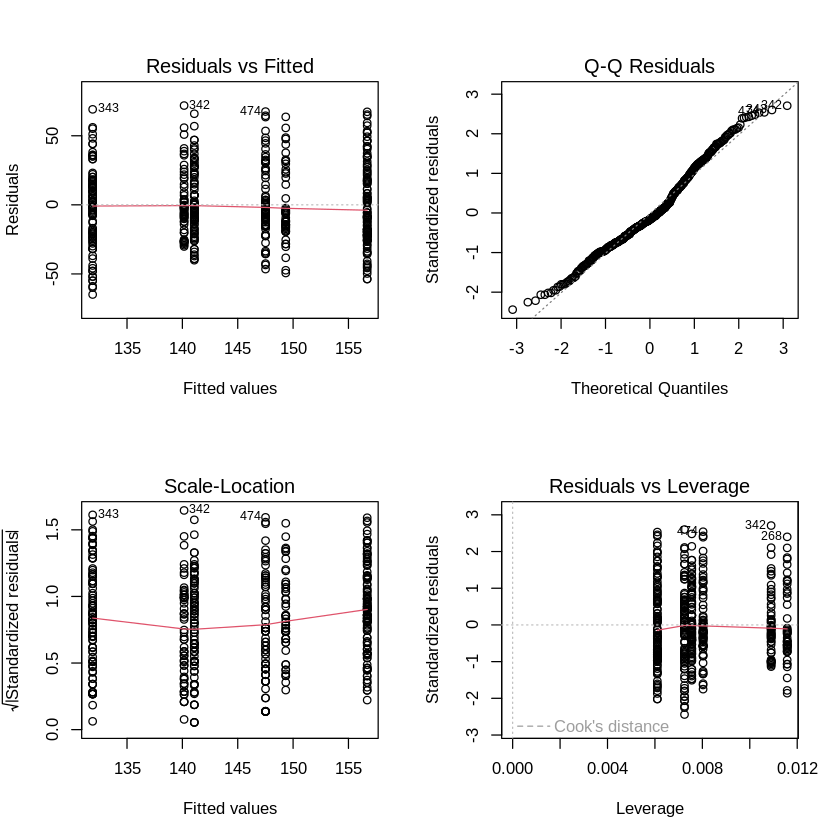

In [ ]:
par(mfrow = c(2, 2))

plot(linearmodel)

par(mfrow = c(1, 1))

Residuals vs Fitted: Ideally, the residuals should be scattered around the horizontal line at zero. This is also the case in this plot, showing there is equal variance between the subsets of smoking and BMI category.

Normal Q-Q plot: This plot evaluates the normality of the residuals by comparing them to a theoretical normal distribution. Points close to the diagonal line indicate normality, departures from the line suggest non-normality. As the points in this plots are closely aligned with the diagonal line, indicating that the observed residuals are approximately normally distributed, the assumption of normality is supported.

Scale-Location (Sqrt |Residuals| vs Fitted): The Scale-Location plot is similar to Residuals vs Fitted but uses the square root of the absolute residuals to evaluate the heteroscedasticity. Although the red line is not completely horizontal, the points are still consistently spread around the line implying equal variance.

Residuals vs Leverage: All data points have low leverage, shown by their proximity to zero on the x-axis (less than 0.012), suggesting the model predicts actual values well. Residuals, the differences between predicted and actual values, are also low (between -3 and 3), indicating accurate model predictions. There are no outliers, as no data points extend beyond the Cook's distance (represented by the dashed line), which is not even visible in the plot. This suggests the model is robust and doesn't rely heavily on any single data point.

# Conclusion
The general linear model analysis revealed an extremely significant association between Systolic Blood Pressure and Smoking and BMI over 30. There is also a significant association between Systolic Blood Pressure and BMI between 25 and 30.

The estimated intercept is 131.897 (95% CI [127.434660, 136.35897], p = 2e-16 < 0.001). This is the predicted value of Systolic Blood Pressure when both Smoking and BMI terms are zero. While Smoking exhibited an average increase of 9.181 units in systolic blood pressure compared to non-smokers (95% CI [4.434197, 13.92793], p = 0.000163 < 0.001), BMI between 25 and 30 displayed an average increase of 8.259 units per weight category, holding other variables constant (95% CI [1.941414, 14.57591], p = 0.010503 < 0.05). BMI over 30 displayed an average increase of 15.614 units per weight category, holding other variables constant (95% CI [10.268093, 20.95971], p = 1.66e-08 < 0.001).

The model, with its high significance levels, suggests that smoking, BMI between 25 and 30 and BMI over 30 are linked to an increase in Systolic Blood Pressure. However, despite this statistical significance, it's important to note that the model explains only a relatively small proportion (approximately 9.73%) of the variability in systolic blood pressure.


# Further reflections
The researchers initially gathered systolic blood pressure data from 500 individuals, which serves as a solid foundational dataset. However, larger sample sizes are required to increase the power of the statistical tests. Especially for identifying smaller effects or differences, larger samples would be advantageous.

Moreover, it is worth noting that the researchers could have collected additional independent variables to enhance the prediction of the variability in systolic blood pressure based on smoking habits and BMI category. The inclusion of these variables has the potential not only to refine the model but also to account for potential confounding factors that might influence the relationships under investigation. By broadening the scope of variables considered, the study could attain a more comprehensive understanding of the relationship between systolic blood pressure and smoking and BMI. Future research endeavors might benefit from a more extensive data collection approach by including following variables:
- The addition of age as a variable is critical due to its known impact on blood pressure. However, its inclusion might complicate analysis due to potential confounding factors, especially when viewed alongside BMI categories, as the classifications—normal, overweight, or obese—possess different implications for various age groups.
- Similarly, gender is a vital consideration due to its distinct effects on blood pressure. However, including gender could introduce complexities, potentially confounding the study with associations related to both smoking habits and BMI classifications.
- Considering previous medication use is crucial since different medications can affect blood pressure differently.
- Social classes are important too, as they can influence healthcare access and lifestyle.
- Ethnicity is another factor that could be included, recognizing the varied genetic and cultural influences.
- Moreover, the family history of hypertension can also be incorporated as a variable. This is because there might be a genetic link in families that could complicate the connections between other factors, including metabolism, and blood pressure.

Balancing the addition of these factors while considering how they might interact with the main factors—smoking and BMI—will pose a challenge and affects the study's clarity and interpretation.
